# Insurance cost prediction

## MLR model

### Importing Libraries

In [1]:
import numpy as np # Library for working in domain of Linear algebra
import pandas as pd # Library for data manipulation and analysis
import matplotlib.pyplot as plt
"""Comprehensive library for creating static,
animated, and interactive visualizations in Python."""
import seaborn as sns # Data Visualization library

### Import the dataset

In [2]:
dataset = pd.read_csv(r'insurance.csv')
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Visualizing Raw Data

##### So for visualizing our data, we have taken up features like age, bmi and no.of children to show it. As you can see on the y-axis the charge remains common for each feature. People’s age and bmi is in varying amounts that’s why it looks scattered in both the graphs. As for the no.of children, it’s just whether you have them or not, and if you do then how many.

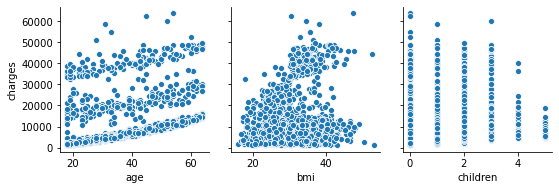

In [3]:
sns.pairplot(dataset,x_vars=['age','bmi','children'],y_vars=['charges'])

##### And heatmap shows the correlation coefficient of age, bmi, children and charges with each other.

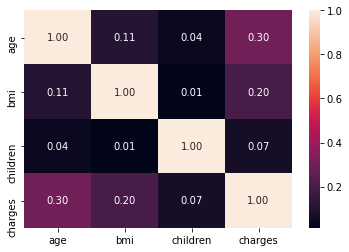

In [4]:
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')

### Creating dummy variables

##### Since these values are categorical variables, they have no quantifiable relationship with each other. That’s why we have shown them with the values 0 or 1 to indicate the absence or presence of the categorical effect.

In [5]:
columns = ['sex','smoker', 'region']
dataset_dv = pd.get_dummies(dataset, columns = columns, drop_first=True)
dataset_dv.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Extracting the x and y

In [6]:
X = dataset_dv.iloc[:,[0,1,2,4,5,6,7,8]].values
Y = dataset_dv.iloc[:,3].values
print("x is",X)
print("y is", Y)

x is [[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]
y is [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Feature Scaling

##### We have done this because the algorithms which we have chosen are sensitive to the range of the data points. So Feature scaling normalizes those features of data.

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[-1.43876426 -0.45332    -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545  0.5096211  -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355  0.38330685  1.58092576 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0148781  -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188 -0.79781341 -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]]


### Splitting Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
# 25% of the original dataset has been allocated for testing

## Using Multiple Linear Regression

In [9]:
# Training the model
from sklearn.linear_model import LinearRegression
Mul_regressor = LinearRegression()
Mul_regressor.fit(X_train,y_train)
# We've just fit the model with the training set values.

LinearRegression()

### Predicting Values

In [10]:
y_pred = Mul_regressor.predict(X_test)

### Comparing Y_test And Y_pred

In [11]:
df = pd.DataFrame({'Test values': y_test, 'Predicted values': y_pred})
df.head(10)

,Test values,Predicted values
0,9095.06825,8952.208557
1,5272.17580,7053.797168
2,29330.98315,36888.369112
3,9301.89355,9522.497587
4,33750.29180,26961.846382
5,4536.25900,10878.245761
6,2117.33885,89.958647
7,14210.53595,17048.243992
8,3732.62510,1006.238679
9,10264.44210,11302.094302


### Visualizing Y_test and Y_pred

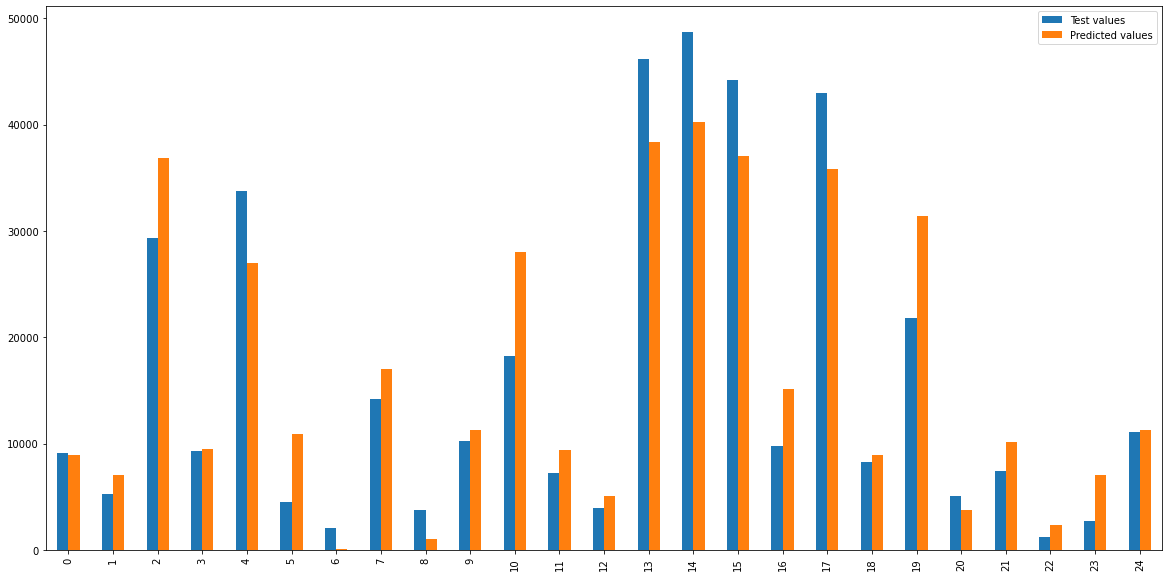

In [12]:
df.head(25).plot(kind='bar',figsize=(20,10))
plt.show()

Text(0, 0.5, 'Predicted Data')

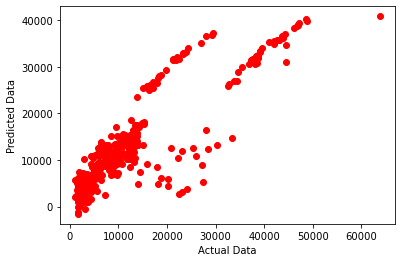

In [13]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

### Calculating Accuracy

In [14]:
import sklearn.metrics as met
mse = met.mean_squared_error(y_test,y_pred)
print('MSE : ',mse)
r2 = met.r2_score(y_test,y_pred)
print('R-square_score : ',r2)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  35117755.736136325
R-square_score :  0.7672642952734356
RMSE :  5926.023602394469


### Inference of MLR model

#### The multiple linear regression model can help us infer that region and gender do not bring a significant difference in insurance charges. The factors that do matter include age, BMI, number of children and smoking. Smoking seems to have the most influence on medical charges. Though the final model explains 75% of the data, there seems to be an indication of a non-linear relationship between the dependent and independent variables.

## Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
Rfr_regressor = RandomForestRegressor(bootstrap = True, n_estimators = 500,
                                          max_features='log2',min_samples_split=4, random_state=0)
# We've kept n_estimators as 500 because we want to have high
# no.of trees although it makes the code slower
# We've kept max_features as 'log2' to search for the best split
# We've kept min_samples_split as '4' because that's the minimum
# number of samples we required to split an internal node
Rfr_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_split=4,
                      n_estimators=500, random_state=0)

### Predicting Values

In [16]:
y_pred = Rfr_regressor.predict(X_test)

### Comparing Y_test And Y_pred

In [17]:
df = pd.DataFrame({'Test values': y_test, 'Predicted values': y_pred})
df.head(10)

,Test values,Predicted values
0,9095.06825,11116.556234
1,5272.17580,6038.746002
2,29330.98315,28183.753836
3,9301.89355,11178.427470
4,33750.29180,33525.773532
5,4536.25900,6648.890940
6,2117.33885,2754.968574
7,14210.53595,15035.799482
8,3732.62510,5538.990241
9,10264.44210,11271.361755


### Visualizing Y_test and Y_pred

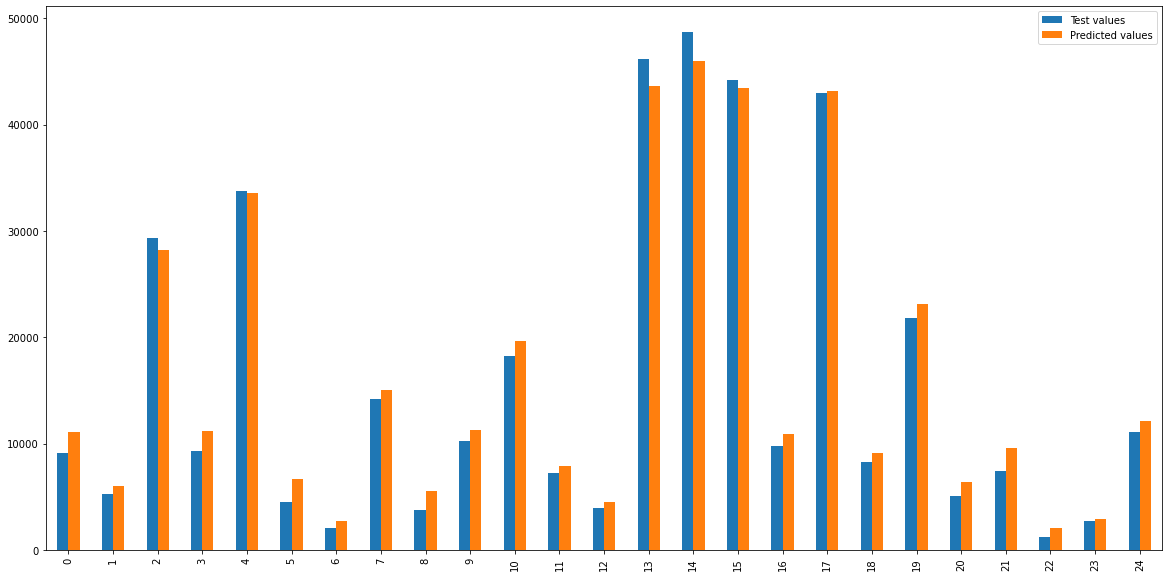

In [18]:
df.head(25).plot(kind='bar',figsize=(20,10))
plt.show()

Text(0, 0.5, 'Predicted Data')

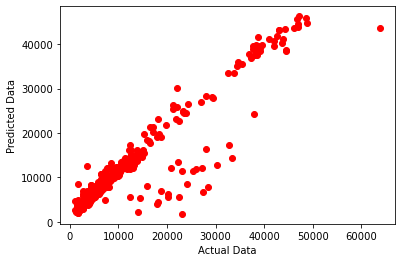

In [19]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

### Calculating Accuracy

In [20]:
import sklearn.metrics as met
mse = met.mean_squared_error(y_test,y_pred)
print('MSE : ',mse)
r2 = met.r2_score(y_test,y_pred)
print('R-square_score : ',r2)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  20980036.86016629
R-square_score :  0.8609591199241793
RMSE :  4580.3970199281075


### Inference of RFR model

#### By looking at the model, we can surely infer that dataset values of "gender" and "region" do not play any huge role to bring a significant difference in Insurance charges. When we look at the remaining factors, they are the ones which matter, i.e. Age, BMI, no.of children and smoking. Smoking is a habit which is resulting towards having a significant influence on the medical charges. The final model explains the data with an accuracy of 86.09%.

## Applying PCA With Random Forest Regressor

[0.18 0.17 0.14 0.13 0.12 0.11 0.1  0.04]


<BarContainer object of 8 artists>

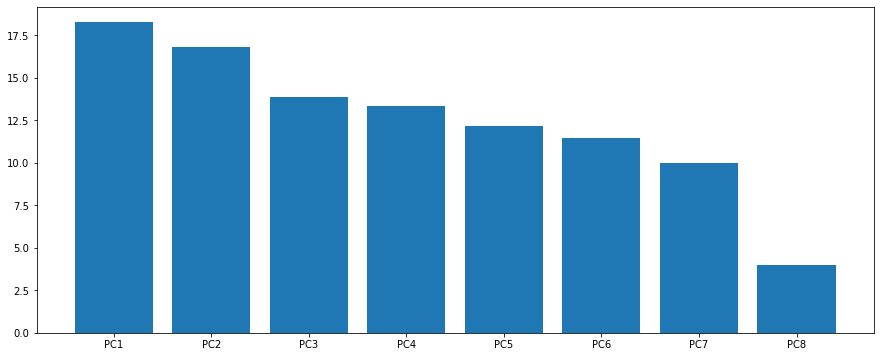

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
np.set_printoptions(precision=2)
print(explained_variance)
np.set_printoptions(precision=2)
plt.figure(figsize=(15,6))
plt.bar(x=[f"PC{i}" for i in range(1,9)], height=explained_variance*100)

In [22]:
loading_scores = pd.Series(pca.components_[0], index = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

region_southeast    0.652007
region_northwest    0.589676
bmi                 0.451833
children            0.091762
smoker_yes          0.087802
sex_male            0.068915
age                 0.036155
region_southwest    0.028795
dtype: float64

### Training With Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
Rfr_PCA_regressor = RandomForestRegressor(bootstrap = True, n_estimators = 500, random_state = 0,
                                          max_features='log2',min_samples_split=4)
# We've kept n_estimators as 500 because we want to have high
# no.of trees although it makes the code slower.
# We've kept max_features as 'log2' to search for the best split.
# We've kept min_samples_split as '4' because that's the minimum
# number of samples we required to split an internal node.                                         
Rfr_PCA_regressor.fit(x_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_split=4,
                      n_estimators=500, random_state=0)

### Predicting Values

In [24]:
y_pred = Rfr_PCA_regressor.predict(x_test)

### comparing Y_test And Y_pred

In [25]:
df = pd.DataFrame({'Test values': y_test, 'Predicted values': y_pred})
df.head(10)

,Test values,Predicted values
0,9095.06825,10101.740420
1,5272.17580,9205.997340
2,29330.98315,28283.048156
3,9301.89355,13423.837100
4,33750.29180,30187.118084
5,4536.25900,6312.432527
6,2117.33885,4115.669864
7,14210.53595,16885.950091
8,3732.62510,6525.445462
9,10264.44210,10259.394493


### Visualizing Y_test and Y_pred

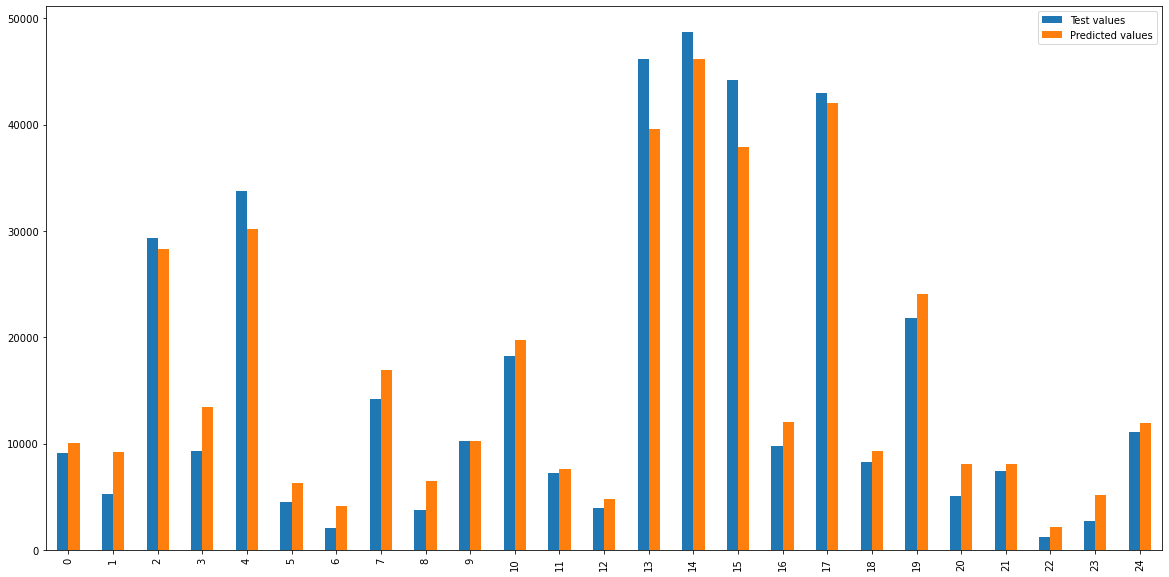

In [26]:
df.head(25).plot(kind='bar',figsize=(20,10))
plt.show()

Text(0, 0.5, 'Predicted Data')

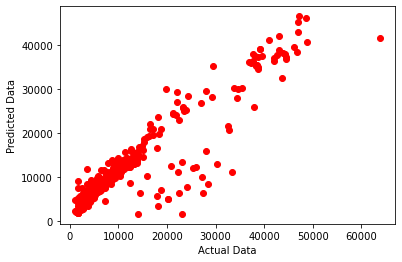

In [27]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

### Calculating Accuracy

In [28]:
import sklearn.metrics as met
mse = met.mean_squared_error(y_test,y_pred)
print('MSE : ',mse)
r2 = met.r2_score(y_test,y_pred)
print('R-square_score : ',r2)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  24910336.249929514
R-square_score :  0.8349118689228381
RMSE :  4991.025570955284


### Inference of RFR with PCA model

#### After we applied PCA on features and trained it with RFR, the amount of accuracy which has been observed is comparatively less although PCA is very useful to speed up the computation by reducing the dimensionality of the data. We have achieved an accuracy of 83.49%. We can conclude that PCA wasn't helpful in getting more accurate result compared to RFR model alone.